# <center>Wizualizacja wyników i testy statystyczne</center>
---
## 1. Biblioteki i edycja danych
### 1.1 Biblioteki

In [1]:
library(dplyr)
library(ggplot2)
library(FSA)
library(mgcv)

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'FSA' was built under R version 3.6.3"## FSA v0.8.30. See citation('FSA') if used in publication.
## Run fishR() for related website and fishR('IFAR') for related book.
Warning message:
"package 'mgcv' was built under R version 3.6.3"Loading required package: nlme
Warning message:
"package 'nlme' was built under R version 3.6.3"
Attaching package: 'nlme'

The following object is masked from 'package:dplyr':

    collapse

This is mgcv 1.8-31. For overview type 'help("mgcv-package")'.


### 1.2 Wczytanie i edycja danych

In [2]:
csv_data <- read.csv("times_cows.csv",
                     col.names = c("statsmodel_formula", "statsmodel_matrix", "lme4", "nlme", "mgcv"))

head(csv_data)

statsmodel_formula,statsmodel_matrix,lme4,nlme,mgcv
0.5667,0.5457,0.034,0.054,1.8668
0.6446,0.6686,0.027,0.054,1.8926
0.6416,0.6027,0.026,0.053,1.9927
0.6846,0.6176,0.026,0.053,1.8993
0.6816,0.6696,0.029,0.053,1.9611
0.6506,0.6196,0.029,0.053,1.9931


In [3]:
csv_data_2 <- stack(csv_data) %>%
    rename(Czas_wykonania = values, Biblioteka = ind) %>%
    mutate(Jezyk = ifelse(Biblioteka %in% c("statsmodel_formula", "statsmodel_matrix"), "Python", "R"))

head(csv_data_2)

Czas_wykonania,Biblioteka,Jezyk
0.5667,statsmodel_formula,Python
0.6446,statsmodel_formula,Python
0.6416,statsmodel_formula,Python
0.6846,statsmodel_formula,Python
0.6816,statsmodel_formula,Python
0.6506,statsmodel_formula,Python


## 2. Wizualizacja
### 2.1 Zestawienie czasów wykonywania funkcji bibliotek języków Python i R

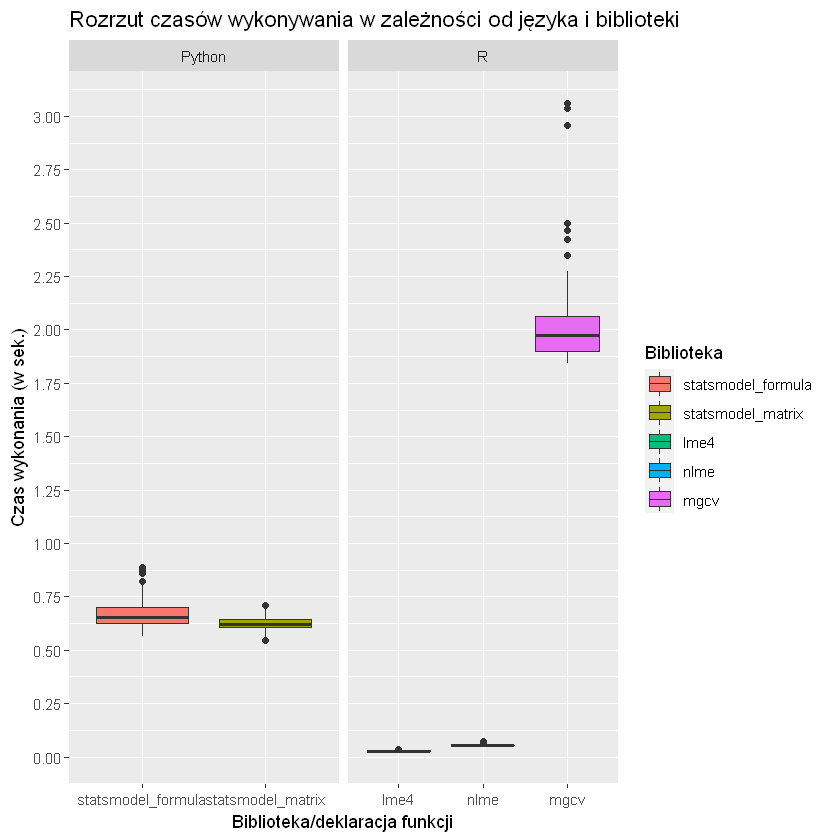

In [4]:
csv_data_2 %>%
      ggplot(aes(x = Biblioteka, y = Czas_wykonania, fill = Biblioteka)) +
      ggtitle("Rozrzut czasów wykonywania w zależności od języka i biblioteki") +
      ylab("Czas wykonania (w sek.)") +
      xlab("Biblioteka/deklaracja funkcji") +
      geom_boxplot() +
      facet_wrap(~Jezyk, scale = "free_x") +
      scale_y_continuous(breaks=seq(0, 3, 0.25))

### 2.2 Zestawienie czasów wykonywania deklaracji funkcji biblioteki "statsmodel" w języku Python

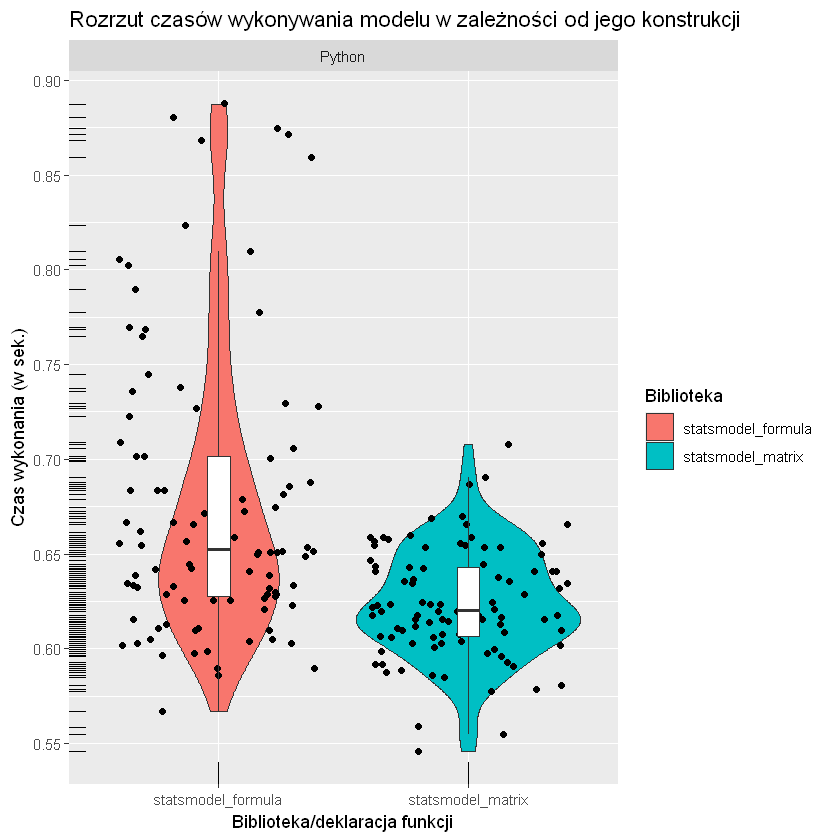

In [5]:
csv_data_2 %>%
    filter(Biblioteka %in% c("statsmodel_formula", "statsmodel_matrix")) %>%
        ggplot(aes(x = Biblioteka, y = Czas_wykonania, label = Biblioteka)) +
        scale_y_continuous(breaks = seq(0, 1, 0.05)) +
        ggtitle("Rozrzut czasów wykonywania modelu w zależności od jego konstrukcji") +
        ylab("Czas wykonania (w sek.)") +
        xlab("Biblioteka/deklaracja funkcji") +
        geom_violin(aes(fill = Biblioteka)) + geom_jitter() + geom_boxplot(width = .09, outlier.colour = NA) + geom_rug() +
        facet_wrap(~Jezyk)

### 2.3 Zestawienie czasów wykonywania funkcji z bibliotek "lme4", "nlme" i "bam" w języku R

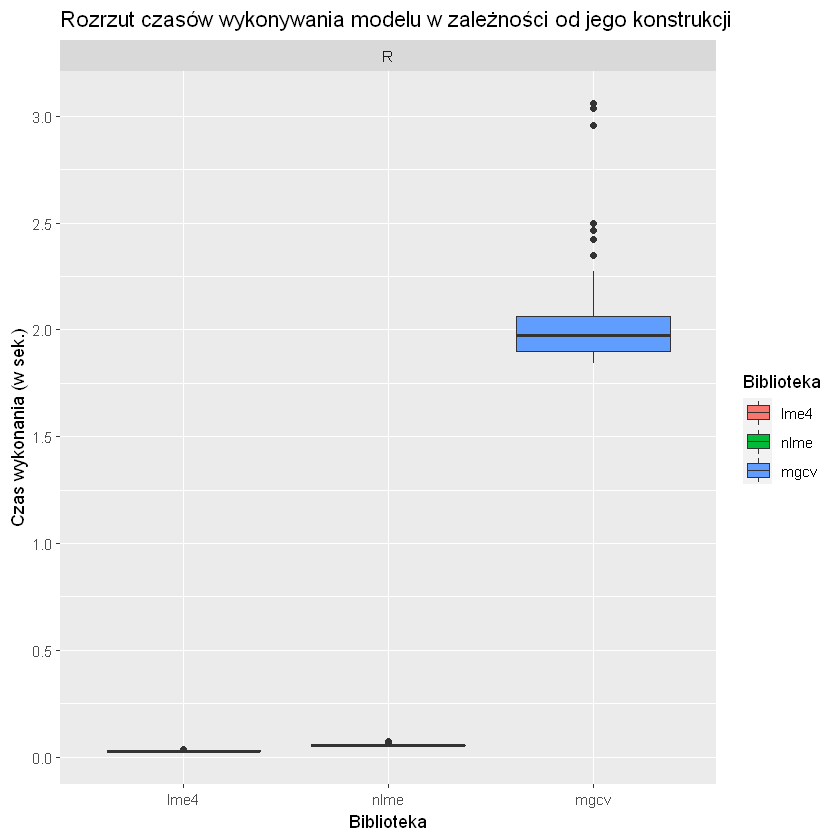

In [6]:
csv_data_2 %>%
    filter(Biblioteka %in% c("lme4", "nlme", "mgcv")) %>%
        ggplot(aes(x = Biblioteka, y = Czas_wykonania, fill = Biblioteka)) +
        scale_y_continuous(breaks = seq(0, 3, 0.5)) +
        ylab("Czas wykonania (w sek.)") +
        ggtitle("Rozrzut czasów wykonywania modelu w zależności od jego konstrukcji") +
        geom_boxplot() +
        facet_wrap(~ Jezyk)

### 2.4 Zestawienie czasów wykonywania funkcji z bibliotek "lme4", "nlme" w języku R

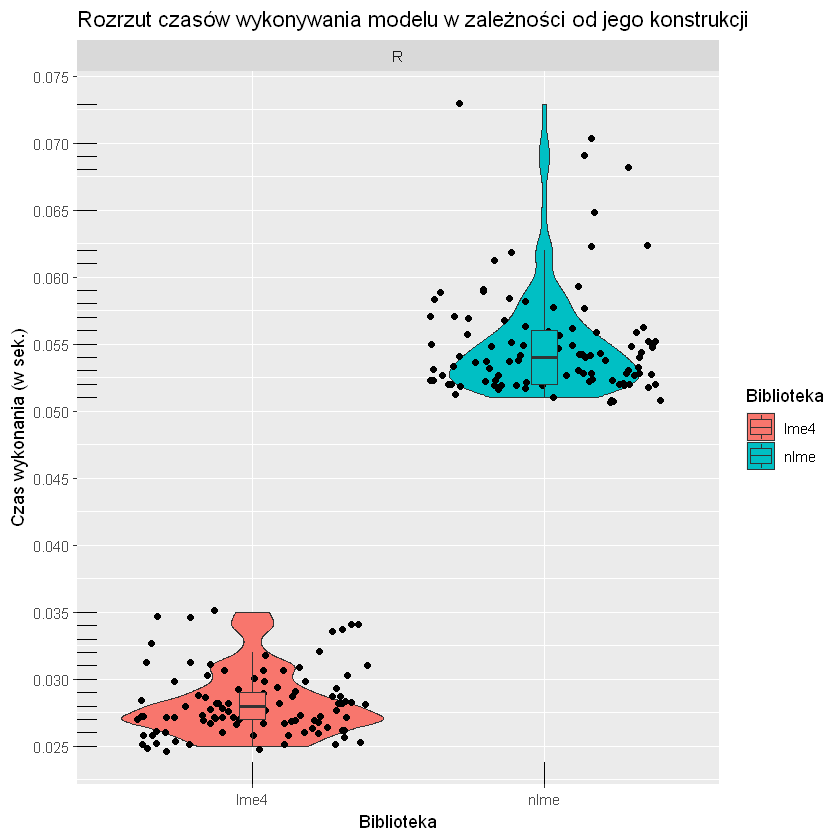

In [7]:
csv_data_2 %>%
    filter(Biblioteka %in% c("lme4", "nlme")) %>%
        ggplot(aes(x=Biblioteka, y=Czas_wykonania, fill=Biblioteka)) +
        scale_y_continuous(breaks = seq(0, 0.1, 0.005)) +
        ylab("Czas wykonania (w sek.)") +
        ggtitle("Rozrzut czasów wykonywania modelu w zależności od jego konstrukcji") +
        geom_violin(aes(fill = Biblioteka)) +
        geom_jitter() +
        geom_boxplot(width = .09, outlier.colour = NA) +
        geom_rug() +
        facet_wrap(~Jezyk)

## 3. Testy statystyczne

### 3.1 Sprawdzenie różnic w średnich czasów wykonywania biblioteki statsmodel "formula" i "matrix" (Python)
#### 3.1.1 Sprawdzenie normalności rozkładów
##### H0: Czasy wykonywania funkcji z bibliotek mają rozkład normalny
###### HA: Czasy wykonywania funkcji z bibliotek nie mają rozkładu normalnego

In [8]:
for(i in c("statsmodel_formula", "statsmodel_matrix")) {
    print(shapiro.test(csv_data_2$Czas_wykonania[csv_data_2$Biblioteka == i]))
}


	Shapiro-Wilk normality test

data:  csv_data_2$Czas_wykonania[csv_data_2$Biblioteka == i]
W = 0.87306, p-value = 9.33e-08


	Shapiro-Wilk normality test

data:  csv_data_2$Czas_wykonania[csv_data_2$Biblioteka == i]
W = 0.99045, p-value = 0.7006



##### Wniosek: Brak normalności rozkładów

#### 3.1.2 Test Wilcoxona (nieparametryczny)
###### H0: Średnie czasy wykonywania deklaracji funkcji "formula" i "matrix" nie różnią się.
###### HA: Średni czas wykonywania deklaracji funkcji "formula" jest większy niż "matrix".

In [9]:
wilcox.test(csv_data$statsmodel_formula, csv_data$statsmodel_matrix, alternative = "greater")


	Wilcoxon rank sum test with continuity correction

data:  csv_data$statsmodel_formula and csv_data$statsmodel_matrix
W = 7313, p-value = 7.988e-09
alternative hypothesis: true location shift is greater than 0


##### Wniosek: Średni czas wykonywania deklaracji funkcji "formula" jest większy niż "matrix".

### 3.2 Sprawdzenie różnic w średnich czasach wykonywania wszystkich bibliotek
#### 3.2.1 Nieparametryczna ANOVA - do sprawdzenia, czy średnie czasy wszystkich funkcji są równe
###### > H0: Średnie czasy wykonywania funkcji nie różnią się.
###### > HA: Średnie czasy wykonywania różnią się dla przynajmniej jednej pary funkcji.

In [10]:
kruskal.test(csv_data)


	Kruskal-Wallis rank sum test

data:  csv_data
Kruskal-Wallis chi-squared = 460.39, df = 4, p-value < 2.2e-16


##### > Wniosek: Średnie czasy wykonywania różnią się dla przynajmniej jednej pary funkcji.

#### 3.2.2 Test Dunneta - do sprawdzenia istotności różnic w grupach (funkcjach)

In [11]:
dun <- dunnTest(Czas_wykonania~Biblioteka, data = csv_data_2, kw = TRUE)

dun$res[order(abs(dun$res[2]), decreasing = TRUE),]

,Comparison,Z,P.unadj,P.adj
1,lme4 - mgcv,-19.580069,2.287113e-85,2.287113e-84
3,mgcv - nlme,14.685052,8.037299e-49,7.233569e-48
4,lme4 - statsmodel_formula,-13.369760,9.083286e-41,7.266628e-40
7,lme4 - statsmodel_matrix,-11.105326,1.181859e-28,8.273013e-28
6,nlme - statsmodel_formula,-8.474743,2.355985e-17,1.413591e-16
8,mgcv - statsmodel_matrix,8.474743,2.355985e-17,1.177992e-16
5,mgcv - statsmodel_formula,6.210308,5.288074e-10,2.115230e-09
9,nlme - statsmodel_matrix,-6.210308,5.288074e-10,1.586422e-09
2,lme4 - nlme,-4.895017,9.829713e-07,1.965943e-06
10,statsmodel_formula - statsmodel_matrix,2.264435,2.354738e-02,2.354738e-02


##### > Wniosek: We wszystkich parach średnie czasy wykonywania różnią się. Największa różnica występuje między bibliotekami "mgcv" i "lme4" w języku R, natomiast najmniejsza - "statsmodel_formula" i "statsmodel_matrix" w języku Python.